In [5]:
import requests
import bs4
import pandas as pd

In [6]:
url="/content/yf.html"

In [8]:
with open(url) as fp:
    soup = bs4.BeautifulSoup(fp, 'html.parser')

In [9]:
tesla_data=pd.read_html(str(soup.find_all('table')))[0]

In [10]:
tesla_data.drop(tesla_data.tail(1).index,inplace=True)

In [11]:
tesla_data.describe()

,Date,Open,High,Low,Close*,Adj Close**,Volume
count,100,100,100,100,100,100,100
unique,100,100,99,99,99,99,100
top,"Feb 28, 2023",210.59,214.66,180.63,194.70,194.70,152619500
freq,1,1,2,2,2,2,1


In [12]:
tesla_data.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Oct 11, 2022",220.95,225.75,215.00,216.50,216.50,77013200
96,"Oct 10, 2022",223.93,226.99,218.36,222.96,222.96,67925000
97,"Oct 07, 2022",233.94,234.57,222.02,223.07,223.07,83916800
98,"Oct 06, 2022",239.44,244.58,235.35,238.13,238.13,69298400
99,"Oct 05, 2022",245.01,246.67,233.27,240.81,240.81,86982700


In [13]:
tesla_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Feb 28, 2023",210.59,211.23,203.75,205.71,205.71,152619500
1,"Feb 27, 2023",202.03,209.42,201.26,207.63,207.63,161028300
2,"Feb 24, 2023",196.33,197.67,192.80,196.88,196.88,141965900
3,"Feb 23, 2023",203.91,205.14,196.33,202.07,202.07,146360000
4,"Feb 22, 2023",197.93,201.99,191.78,200.86,200.86,191828500


In [14]:
tesla_data_reverse=tesla_data[::-1]

In [15]:
tesla_data_reverse.set_index('Date')

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Oct 05, 2022",245.01,246.67,233.27,240.81,240.81,86982700
"Oct 06, 2022",239.44,244.58,235.35,238.13,238.13,69298400
"Oct 07, 2022",233.94,234.57,222.02,223.07,223.07,83916800
"Oct 10, 2022",223.93,226.99,218.36,222.96,222.96,67925000
"Oct 11, 2022",220.95,225.75,215.00,216.50,216.50,77013200
...,...,...,...,...,...,...
"Feb 22, 2023",197.93,201.99,191.78,200.86,200.86,191828500
"Feb 23, 2023",203.91,205.14,196.33,202.07,202.07,146360000
"Feb 24, 2023",196.33,197.67,192.80,196.88,196.88,141965900


In [16]:
tesla_data_reverse_numeric=tesla_data_reverse.iloc[:,[1,2,3,4,5,6]].astype(float)

In [ ]:
Tesla_D=tesla_data_reverse['Date']
month_map = {'Oct': '10,', 'Nov': '11,', 'Dec': '12,', 'Jan': '01,', 'Feb': '02,'}
da = [i.replace(month, num) for i in tesla_data_reverse['Date'] for month, num in month_map.items() if month in i]
ls=[]
for i in da:
  i=i.replace(",","/")
  i=i.replace(" ","")
  i1=i[0:6]
  i2=i[8:10]
  ls.append(i1+i2)
ls

In [ ]:
from datetime import datetime
#datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
ls2=[]
for i in ls:
  i=datetime.strptime(i,'%m/%d/%y')
  ls2.append(i)
ls2

In [25]:
tesla_data_reverse_numeric['Date_Time']=ls2

<AxesSubplot:xlabel='Date_Time'>

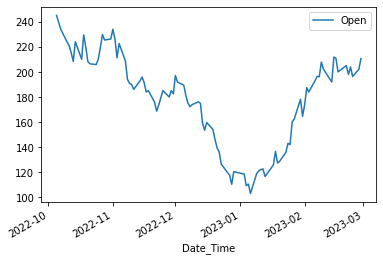

In [26]:
tesla_data_reverse_numeric.plot(x='Date_Time',y='Open')

<AxesSubplot:xlabel='Date_Time'>

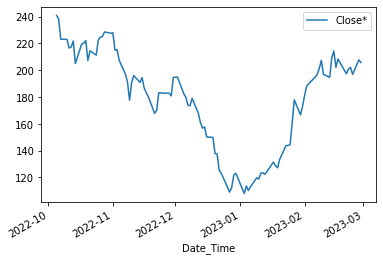

In [36]:
tesla_data_reverse_numeric.plot(x='Date_Time',y='Close*')

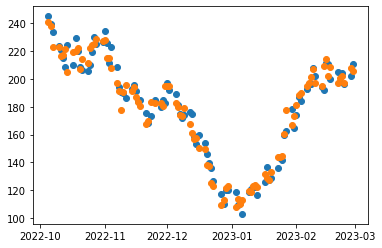

In [44]:
import matplotlib.pyplot as plt
x=tesla_data_reverse_numeric.Date_Time
y=tesla_data_reverse_numeric.Open
y2=tesla_data_reverse_numeric['Close*']
plt.scatter(x,y)
plt.scatter(x,y2)

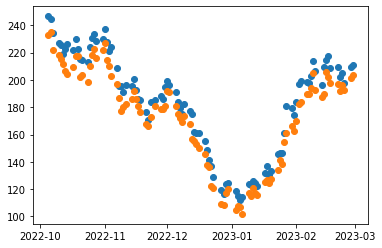

In [43]:
x=tesla_data_reverse_numeric.Date_Time
y4=tesla_data_reverse_numeric.High
y3=tesla_data_reverse_numeric['Low']
plt.scatter(x,y4)
plt.scatter(x,y3)

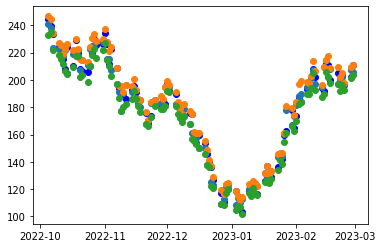

In [55]:
plt.scatter(x,y,color="Blue")
plt.scatter(x,y2)
plt.scatter(x,y4)
plt.scatter(x,y3)